## Import packge

First of all, we import the packges needed as:

In [1]:
import os
import numpy as np
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

## Build multi-file dataset

We will use the `open_mfdataset` function from `xArray` to open multiple netCDF files into a single xarray Dataset. 

The base URL is define as:

In [2]:
# For the bio dataset
base_url = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-"

# For the hydro dataset
base_url2 = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"

In [3]:
month_st = 3   # Starting month 
month_ed = 3   # Ending month 
year = 2015    # Year

# Based on the server the file naming convention 
biofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]
hydrofiles = [f"{base_url2}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]

### Loading dataset into xArray

Using `xArray`, we open these files into a `Dataset`:

In [4]:
ds_bio = xr.open_mfdataset(biofiles)
ds_hydro = xr.open_mfdataset(hydrofiles)

## Mackay Reef position:

In [5]:
#Mackay 1
AMreef_lat = -21.129
AMreef_lon = 149.282
#Mackay 2
BMreef_lat = -21.129
BMreef_lon = 149.755
#Mackay 3
CMreef_lat = -21.129
CMreef_lon = 151.26

## Plotting Xarray dataset

Finally, we  use the `Xarray` `plot` function to plot the results we want.




### Plotting PAR for 2015-3-31

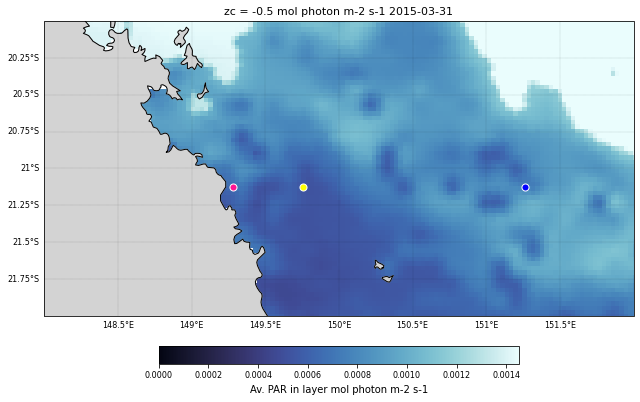

<Figure size 432x288 with 0 Axes>

In [6]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.PAR.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 0.0014517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.PAR.long_name+' '+ds_bio.PAR.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' mol photon m-2 s-1 '+str(ds_bio.coords['time'].values[-1])[:10],
          fontsize=11
         )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())



plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting Temperature for 2015-3-31

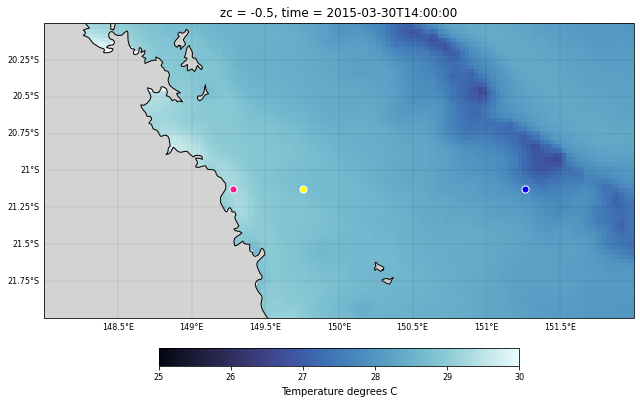

<Figure size 432x288 with 0 Axes>

In [7]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the TEMP at the surface at the final recorded time interval
cf = ds_hydro.temp.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 25, vmax = 30,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_hydro.temp.long_name+' '+ds_hydro.temp.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
#plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' mol photon m-2 s-1 '+str(ds_bio.coords['time'].values[-1])[:10],
         # fontsize=11
 #        )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())




plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting Secchi for 2015-3-31

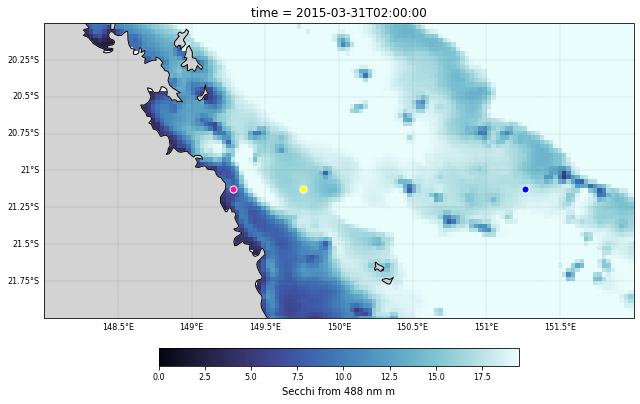

<Figure size 432x288 with 0 Axes>

In [8]:

# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.Secchi.isel(time=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 19.517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.Secchi.long_name+' '+ds_bio.Secchi.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)



# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())




plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting ChlorophyII for 2015-3-31

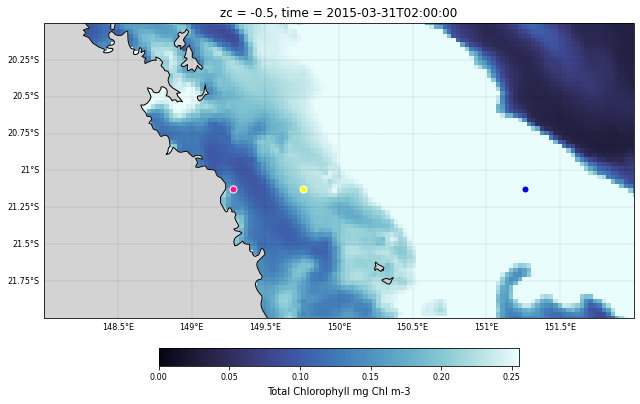

<Figure size 432x288 with 0 Axes>

In [9]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.Chl_a_sum.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 0.25517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.Chl_a_sum.long_name+' '+ds_bio.Chl_a_sum.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)



# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())




plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting Dissolved Inorganic Nitrogen for 2015-3-31

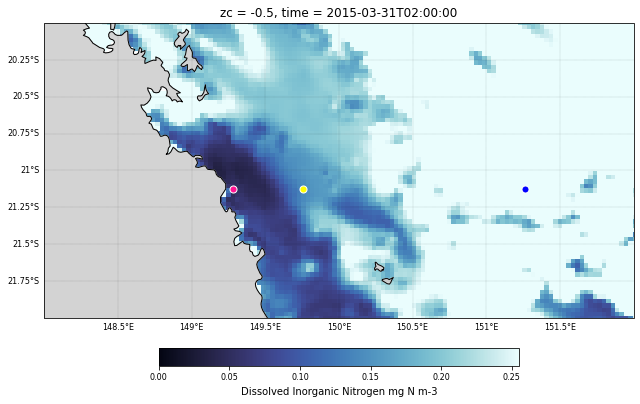

<Figure size 432x288 with 0 Axes>

In [10]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.DIN.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 0.25517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.DIN.long_name+' '+ds_bio.DIN.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)



# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())



plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting TSS for 2015-3-31

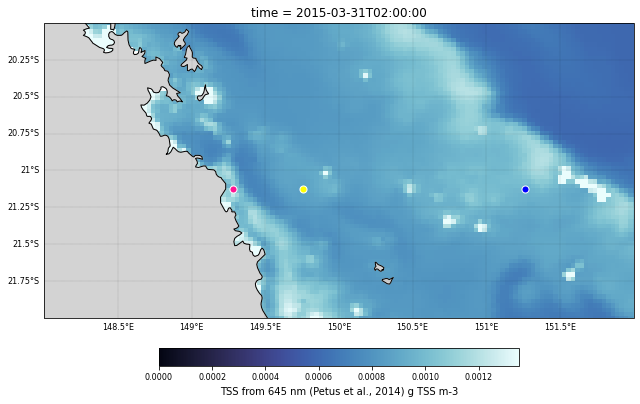

<Figure size 432x288 with 0 Axes>

In [11]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.TSSM.isel(time=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 0.0013517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.TSSM.long_name+' '+ds_bio.TSSM.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)



# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())




plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

In [12]:
month_st = 7   # Starting month 
month_ed = 7   # Ending month 
year = 2015    # Year

# Based on the server the file naming convention 
biofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]
hydrofiles = [f"{base_url2}{year}-{month:02}.nc" for month in range(month_st, month_ed+1)]

In [13]:
ds_bio = xr.open_mfdataset(biofiles)
ds_hydro = xr.open_mfdataset(hydrofiles)

In [14]:
#Mackay 1
AMreef_lat = -21.129
AMreef_lon = 149.282
#Mackay 2
BMreef_lat = -21.129
BMreef_lon = 149.755
#Mackay 3
CMreef_lat = -21.129
CMreef_lon = 151.26

### Plotting PAR for 2015-7-31

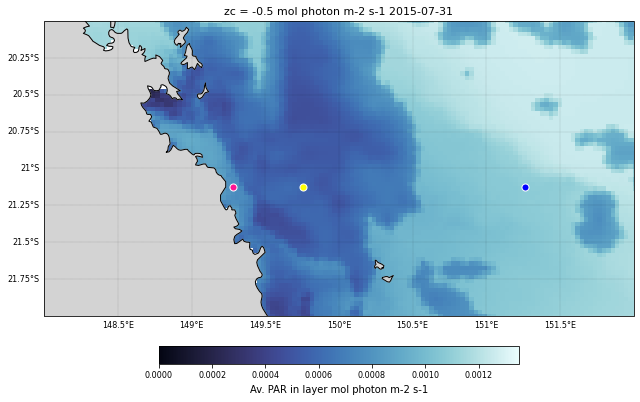

<Figure size 432x288 with 0 Axes>

In [15]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.PAR.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 0.0013517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.PAR.long_name+' '+ds_bio.PAR.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' mol photon m-2 s-1 '+str(ds_bio.coords['time'].values[-1])[:10],
          fontsize=11
         )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())



plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting Temperature for 2015-7-31

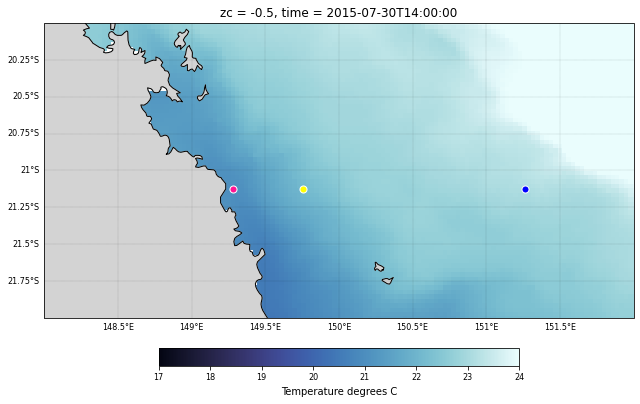

<Figure size 432x288 with 0 Axes>

In [16]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the TEMP at the surface at the final recorded time interval
cf = ds_hydro.temp.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 17, vmax = 24,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_hydro.temp.long_name+' '+ds_hydro.temp.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
#plt.title('zc = '+str(ds_bio.zc.values.item(-1))+' mol photon m-2 s-1 '+str(ds_bio.coords['time'].values[-1])[:10],
         # fontsize=11
 #        )

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())



plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting Secchi for 2015-7-31

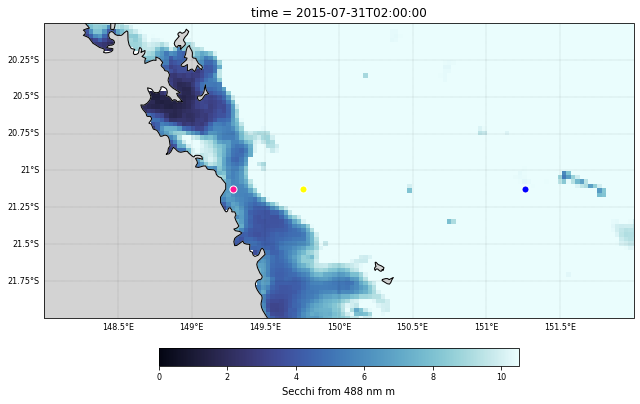

<Figure size 432x288 with 0 Axes>

In [17]:

# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.Secchi.isel(time=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 10.517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.Secchi.long_name+' '+ds_bio.Secchi.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)



# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())



plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting ChlorophyII for 2015-7-31

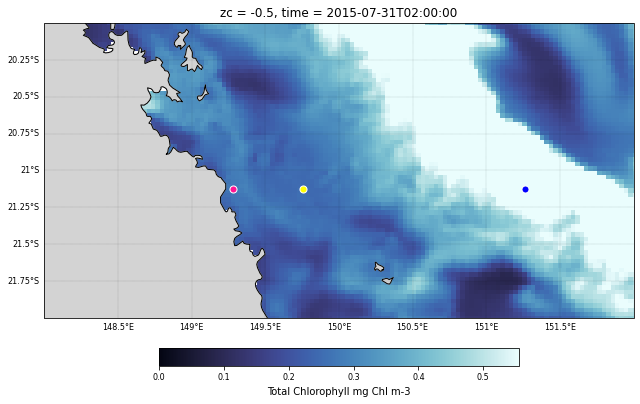

<Figure size 432x288 with 0 Axes>

In [18]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.Chl_a_sum.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 0.55517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.Chl_a_sum.long_name+' '+ds_bio.Chl_a_sum.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)



# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())




plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting Dissolved Inorganic Nitrogen for 2015-7-31

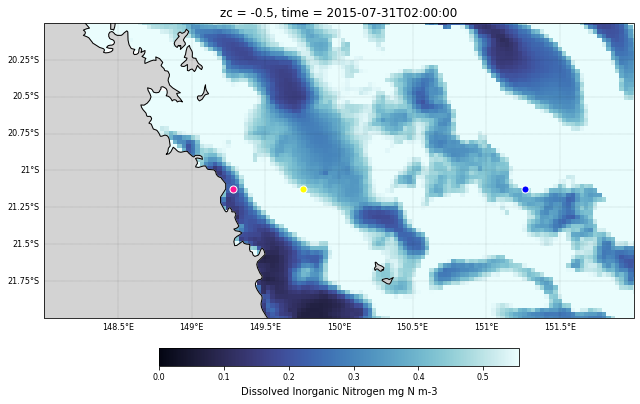

<Figure size 432x288 with 0 Axes>

In [19]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.DIN.isel(time=-1,k=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 0.55517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.DIN.long_name+' '+ds_bio.DIN.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)



# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())




plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

### Plotting TSS for 2015-7-31

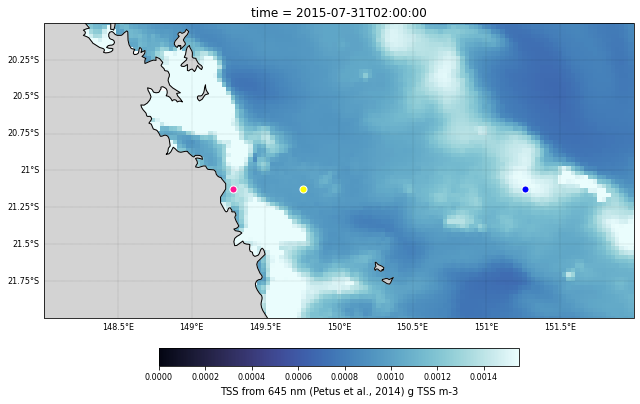

<Figure size 432x288 with 0 Axes>

In [20]:
# Figure size
size = (9, 10)

# Color from cmocean
color = cmocean.cm.ice

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([148, 152, -20, -22], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the PAR at the surface at the final recorded time interval
cf = ds_bio.TSSM.isel(time=-1).plot( 
    transform=ccrs.PlateCarree(), cmap=color,
    vmin = 0, vmax = 0.0015517297,
    add_colorbar=False
)

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(ds_bio.TSSM.long_name+' '+ds_bio.TSSM.units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)



# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)


# Site Mackay1
ax.scatter(AMreef_lon, AMreef_lat, c='deeppink', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay2
ax.scatter(BMreef_lon, BMreef_lat, c='yellow', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())
# Site Mackay3
ax.scatter(CMreef_lon, CMreef_lat, c='blue', s=50, edgecolors='w', linewidth=1, transform=ccrs.PlateCarree())




plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()